<a href="https://colab.research.google.com/github/skourta/clustering_eval/blob/main/USPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & Import

In [ ]:
install.packages("R.matlab")
install.packages(c("Rmixmod", "NbClust", "mclust", "FactoMineR", "Rmixmod", "Rtsne", "lle", "cluster", "aricode", "caret"))
install.packages("umap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘matrixStats’, ‘RcppArmadillo’, ‘lava’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘lazyeval’, ‘later’, ‘prodlim’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘snow’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘RcppEigen’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’, ‘snowfall’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘reticulate’, ‘R

In [ ]:
library(R.matlab)
library(Rmixmod)
library(mclust)
library(NbClust)
library(FactoMineR)
library(lle)
library(cluster)
library(aricode)
library(Rtsne)
library(caret)
library(umap)

R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen


Loading required package: Rcpp

Rmixmod v. 2.1.6 / URI: www.mixmod.org

Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.

Loading required package: scatterplot3d

Loading required package: MASS

Loading required package: snowfall

Loading required package: snow

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


## Lire et visualiser les données

In [ ]:
usps = readMat("data/USPS.mat")

In [ ]:
pca.usps = PCA((usps$X),ncp=2)

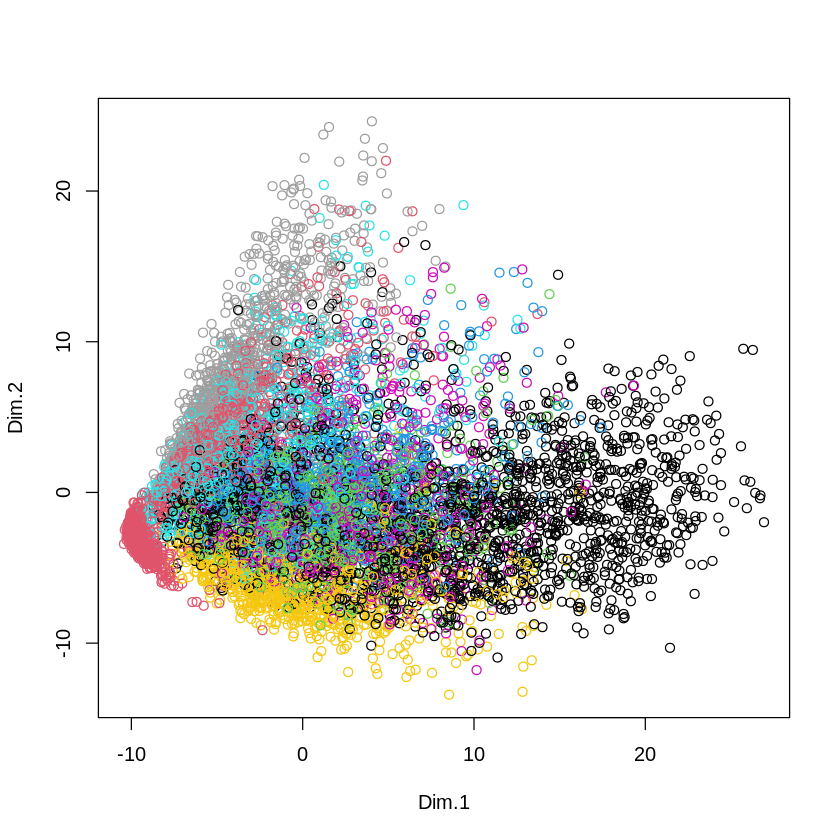

In [ ]:
plot(pca.usps$ind$coord,col=usps$y)

In [ ]:
tsne.usps=Rtsne(usps$X,dim=2 )

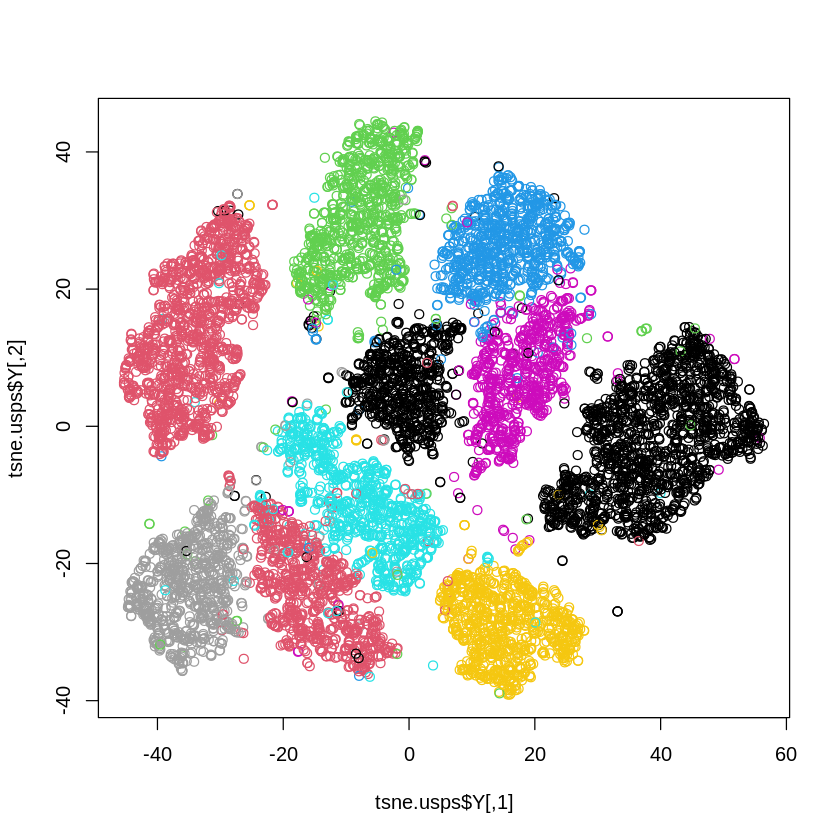

In [ ]:
plot(tsne.usps$Y,col=usps$y)

## Partitionnement

### KMeans

In [ ]:
km.usps = NbClust(usps$X, method = "kmeans", distance = "euclidean", index = "silhouette",max.nc = 10)

In [ ]:
km.usps$Best.nc

Number_clusters     Value_Index 
         2.0000          0.1832

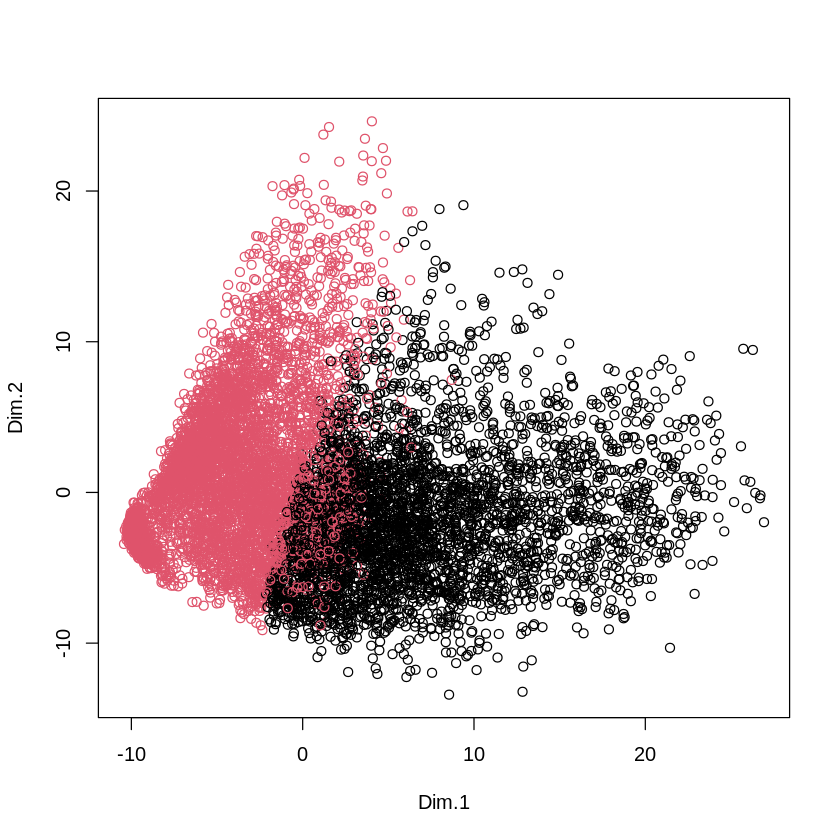

In [ ]:
plot(pca.usps$ind$coord,col=km.usps$Best.partition)

### Average

In [137]:
average.usps = NbClust(usps$X, method = "average", index = "silhouette")

In [ ]:
average.usps$Best.nc

Number_clusters     Value_Index 
         2.0000          0.2405

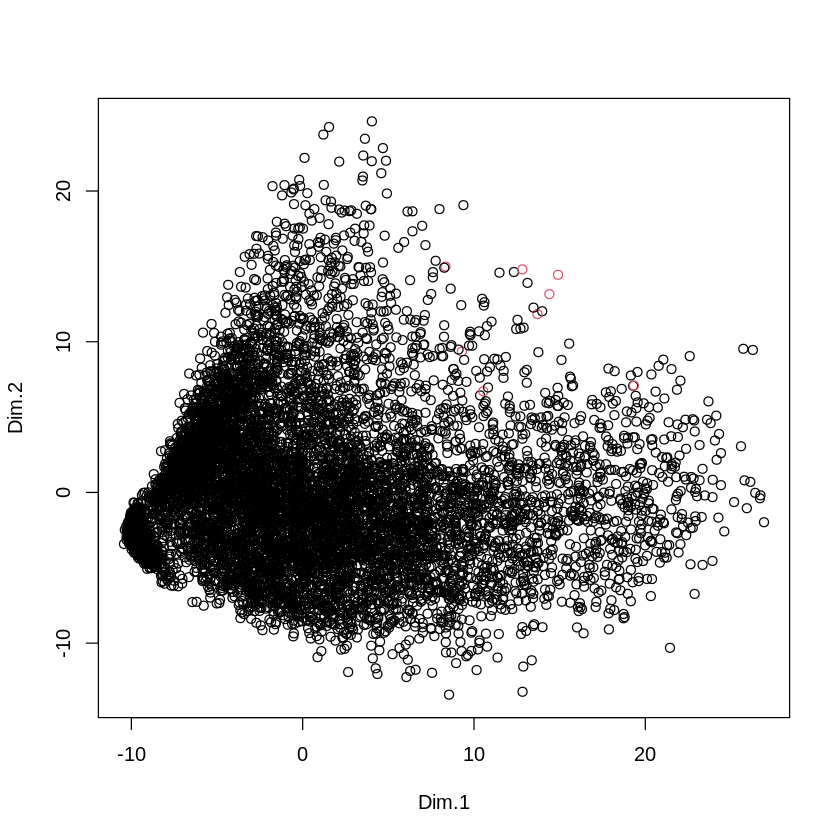

In [ ]:
plot(pca.usps$ind$coord,col=average.usps$Best.partition)

### Ward

In [ ]:
ward.usps = NbClust(usps$X, method = "ward.D", index = "silhouette")

In [ ]:
ward.usps$Best.nc

Number_clusters     Value_Index 
         9.0000          0.1411

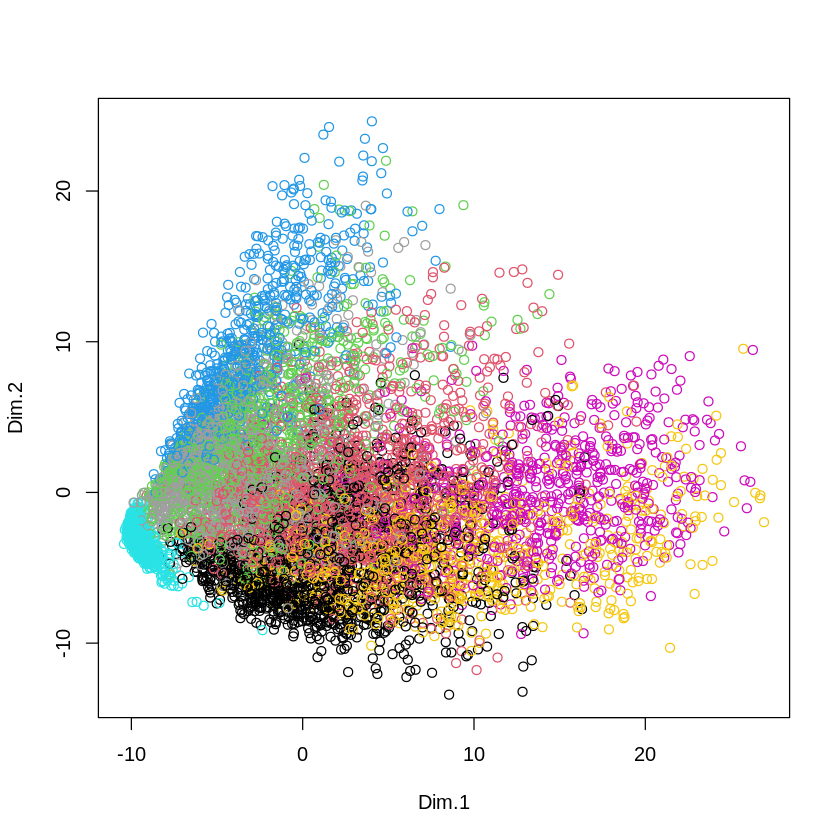

In [ ]:
plot(pca.usps$ind$coord,col=ward.usps$Best.partition)

In [ ]:
table(ward.usps$Best.partition,usps$y)

   
       1    2    3    4    5    6    7    8    9   10
  1    1    2    1    0    9    4  794    0    0    0
  2   18    0   11  804    3  670    9    3   97    2
  3    3    4  153    2  759    8   11   17   27  203
  4    0    0    5    0    3    0    0  751    1   31
  5    0 1244    1    0    3    0    4    0    3    0
  6  638    0    7    5    1   18    8    0    0    0
  7  889    0    0    1    1    3    5    0    4    1
  8    0   19  157   11   64   10    0   20  574  583
  9    4    0  594    1    9    3    3    1    2    1

In [ ]:
nmi.usps = NMI(ward.usps$Best.partition,as.factor(usps$y))
ari.usps =ARI(ward.usps$Best.partition,as.factor(usps$y))

In [ ]:
cat("NMI=", nmi.usps, " - ARI=", ari.usps)

NMI= 0.7308836  - ARI= 0.6350203

### Single

In [ ]:
single.usps = NbClust(usps$X, method = "single", index = "silhouette")

In [ ]:
single.usps$Best.nc

Number_clusters     Value_Index 
          2.000           0.156

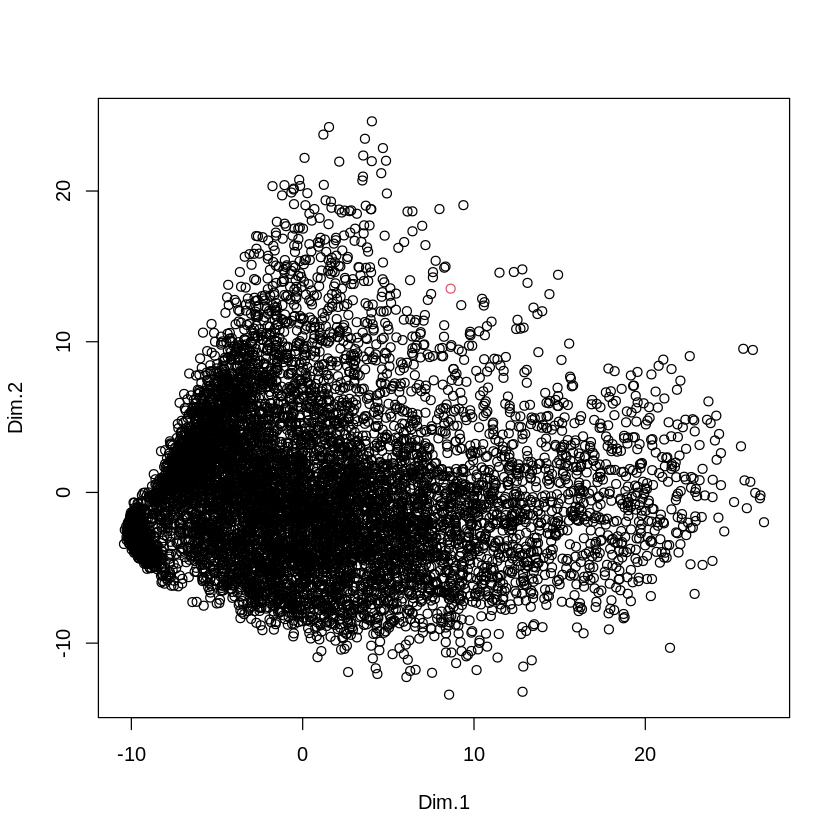

In [ ]:
plot(pca.usps$ind$coord,col=single.usps$Best.partition)

In [ ]:
table(single.usps$Best.partition,usps$y)

   
       1    2    3    4    5    6    7    8    9   10
  1 1553 1269  928  824  852  716  834  792  708  821
  2    0    0    1    0    0    0    0    0    0    0

In [ ]:
nmi.usps = NMI(single.usps$Best.partition,as.factor(usps$y))
ari.usps =ARI(single.usps$Best.partition,as.factor(usps$y))

In [ ]:
cat("NMI=", nmi.usps, " - ARI=", ari.usps)

NMI= 0.0001092281  - ARI= 3.697762e-06

### Complete

In [ ]:
complete.usps = NbClust(usps$X, method = "complete", index = "silhouette")

In [ ]:
complete.usps$Best.nc

Number_clusters     Value_Index 
         2.0000          0.1495

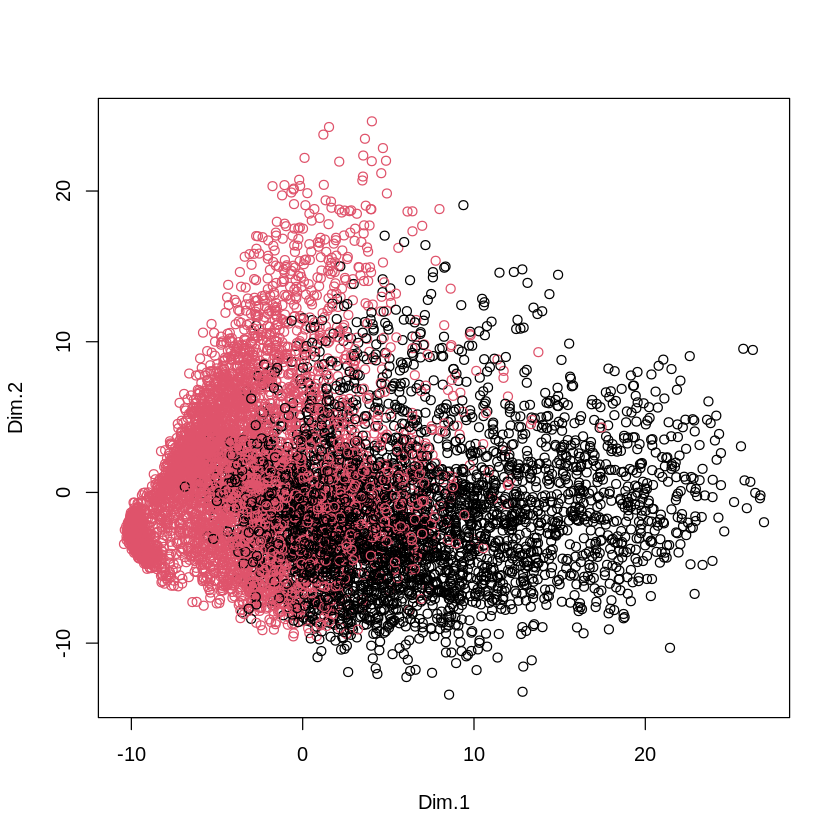

In [ ]:
plot(pca.usps$ind$coord,col=complete.usps$Best.partition)

In [ ]:
table(complete.usps$Best.partition,usps$y)

   
       1    2    3    4    5    6    7    8    9   10
  1 1419    5  431  511  139  493  375    7  249   35
  2  134 1264  498  313  713  223  459  785  459  786

In [ ]:
nmi.usps = NMI(complete.usps$Best.partition,as.factor(usps$y))
ari.usps =ARI(complete.usps$Best.partition,as.factor(usps$y))

In [ ]:
cat("NMI=", nmi.usps, " - ARI=", ari.usps)

NMI= 0.1192861  - ARI= 0.1000722

### Nombre de classes

Le nombre de classes qui a été proposé par toutes les méthodes est 2

## HCPC

In [ ]:
hcpcward.usps=HCPC(pca.usps,method = "ward", nb.clust=-1)

In [ ]:
hcpcward.usps$call$t$nb.clust

[1] 4

In [ ]:
hcpccomp.usps=HCPC(pca.usps,method = "complete", nb.clust=-1)

In [ ]:
hcpccomp.usps$call$t$nb.clust

[1] 3

In [ ]:
hcpcsingle.usps=HCPC(pca.usps,method = "single", nb.clust=-1)

In [ ]:
hcpcsingle.usps$call$t$nb.clust

[1] 3

In [ ]:
hcpcav.usps=HCPC(pca.usps,method = "average", nb.clust=-1)

In [ ]:
hcpcav.usps$call$t$nb.clust

[1] 3

Le nombre de classes qu'on peut proposer après ces résultat est 3

## Confusion

In [ ]:
table(ward.usps$Best.partition, hcpcward.usps$data.clust$clust)

   
       1    2    3    4
  1  203    0  562   46
  2  278  259  892  188
  3  574  457  141   15
  4  166  625    0    0
  5 1254    0    1    0
  6    5   18   93  561
  7   27    0  523  354
  8  920  329  186    3
  9   27   34  498   59

In [ ]:
table(ward.usps$Best.partition, hcpcward.usps$data.clust$clust)

   
       1    2    3    4
  1  203    0  562   46
  2  278  259  892  188
  3  574  457  141   15
  4  166  625    0    0
  5 1254    0    1    0
  6    5   18   93  561
  7   27    0  523  354
  8  920  329  186    3
  9   27   34  498   59

## Melange

On exécute avec un nombre de classes égale à 2 et à 3

### nbcluster = 2

In [154]:
pca.usps = PCA(t(usps$X), graph = FALSE)

La stratégie utilisé par défaut dans cette fonction est "EM" selon la documentation de [mixmodCluster](https://www.rdocumentation.org/packages/Rmixmod/versions/2.1.6/topics/mixmodStrategy?fbclid=IwAR3shF4uwNQ9YDHyTpHSiMtBPEwdsIqeHO_4_wUK9sNOCY6htI5obFrtAZg) et de [mixmodStrategy](https://www.rdocumentation.org/packages/Rmixmod/versions/2.1.5/topics/mixmodCluster).

In [155]:
mmgRmix.usps=mixmodCluster(data=as.data.frame(pca.usps$var$coord),nbCluster=2)

In [156]:
mmgRmix.usps

****************************************
*** INPUT:
****************************************
* nbCluster =  2 
* criterion =  BIC 
****************************************
*** MIXMOD Models:
* list =  Gaussian_pk_Lk_C 
* This list includes only models with free proportions.
****************************************
* data (limited to a 10x10 matrix) =
    Dim.1   Dim.2    Dim.3    Dim.4   Dim.5  
V1  0.5733  0.4046   -0.4875  -0.2323 0.06318
V2  0.3766  0.4201   -0.1268  0.3671  -0.114 
V3  0.402   0.2679   0.1897   -0.5923 -0.1156
V4  0.638   -0.02928 0.6317   0.1143  0.2501 
V5  0.5002  0.3046   -0.08982 0.4613  -0.4366
V6  0.4984  0.5221   0.1167   -0.3717 -0.1306
V7  0.6209  0.1686   0.08808  0.2046  -0.4792
V8  0.7282  -0.5118  -0.2536  0.1734  0.1437 
V9  0.04139 0.6379   -0.07506 0.367   0.2994 
V10 0.7153  -0.4831  -0.2635  0.1922  0.0912 
* ... ...
****************************************
*** MIXMOD Strategy:
* algorithm            =  EM 
* number of tries      =  1 
* number o

In [ ]:
mmgMclust.usps=Mclust(data= usps$X, G=2)

#### Comparaison

In [ ]:
length(mmgRmix.usps@bestResult@partition)

In [ ]:
length(usps$y)

In [ ]:
table(mmgRmix.usps@bestResult@partition,usps$y)

In [ ]:
table( mmgMclust.usps$classification,usps$y)

In [ ]:
NMI(mmgRmix.usps@bestResult@partition, mmgMclust.usps$classification)

Les 2 partitions sont tres bonnes

### nbcluster = 3

In [144]:
pca.usps = PCA(t(usps$X), graph = FALSE)

La stratégie utilisé par défaut dans cette fonction est "EM" selon la documentation de [mixmodCluster](https://www.rdocumentation.org/packages/Rmixmod/versions/2.1.6/topics/mixmodStrategy?fbclid=IwAR3shF4uwNQ9YDHyTpHSiMtBPEwdsIqeHO_4_wUK9sNOCY6htI5obFrtAZg) et de [mixmodStrategy](https://www.rdocumentation.org/packages/Rmixmod/versions/2.1.5/topics/mixmodCluster).

In [145]:
mmgRmix.usps=mixmodCluster(data=as.data.frame(pca.usps$var$coord),nbCluster=3)

In [146]:
mmgRmix.usps

****************************************
*** INPUT:
****************************************
* nbCluster =  3 
* criterion =  BIC 
****************************************
*** MIXMOD Models:
* list =  Gaussian_pk_Lk_C 
* This list includes only models with free proportions.
****************************************
* data (limited to a 10x10 matrix) =
    Dim.1   Dim.2    Dim.3    Dim.4   Dim.5  
V1  0.5733  0.4046   -0.4875  -0.2323 0.06318
V2  0.3766  0.4201   -0.1268  0.3671  -0.114 
V3  0.402   0.2679   0.1897   -0.5923 -0.1156
V4  0.638   -0.02928 0.6317   0.1143  0.2501 
V5  0.5002  0.3046   -0.08982 0.4613  -0.4366
V6  0.4984  0.5221   0.1167   -0.3717 -0.1306
V7  0.6209  0.1686   0.08808  0.2046  -0.4792
V8  0.7282  -0.5118  -0.2536  0.1734  0.1437 
V9  0.04139 0.6379   -0.07506 0.367   0.2994 
V10 0.7153  -0.4831  -0.2635  0.1922  0.0912 
* ... ...
****************************************
*** MIXMOD Strategy:
* algorithm            =  EM 
* number of tries      =  1 
* number o

In [147]:
mmgMclust.usps=Mclust(data= usps$X, G=3)

#### Comparaison

In [148]:
length(mmgRmix.usps@bestResult@partition)

[1] 9298

In [149]:
length(usps$y)

[1] 9298

In [150]:
table(mmgRmix.usps@bestResult@partition,usps$y)

   
       1    2    3    4    5    6    7    8    9   10
  1   30   79  286  801  289  503   27  719  619  726
  2    0 1185    0    0    3    0    0    0    1    0
  3 1523    5  643   23  560  213  807   73   88   95

In [151]:
table( mmgMclust.usps$classification,usps$y)

   
       1    2    3    4    5    6    7    8    9   10
  1 1551   22  926  821  554  711  828  202  680  243
  2    2   10    2    3  271    4    3  588   25  574
  3    0 1237    1    0   27    1    3    2    3    4

In [152]:
NMI(mmgRmix.usps@bestResult@partition, mmgMclust.usps$classification)

[1] 0.4163047

Les 2 partitions sont tres bonnes

Les 2 partitions sont tres bonnes

## MclustDR

D'apres la [documentation](https://rdrr.io/cran/mclust/man/MclustDR.html) MclustDR est une méthode de réduction de dimension pour visualiser la structure de regroupement ou de classification obtenue à partir d'un mélange fini de densités gaussiennes.

In [ ]:
plot(MclustDR(mmgMclust.usps))

## Etude comparative

In [ ]:
unique(as.vector(usps$y))

### KMeans

In [ ]:
nmi.usps = NMI(km.usps$Best.partition,as.factor(usps$y))
ari.usps =ARI(km.usps$Best.partition,as.factor(usps$y))

In [ ]:
table(km.usps$Best.partition,usps$class)

   
       1    2    3    4    5    6    7    8    9   10
  1 1483    1  377  506   66  504  527   13  163   29
  2   70 1268  552  318  786  212  307  779  545  792

In [ ]:
cat("NMI=", nmi.usps, "  - ARI=", ari.usps)

NMI= 0.1411245  - ARI= 0.1165658

### Average

In [ ]:
table(average.usps$Best.partition,usps$y)

   
       1    2    3    4    5    6    7    8    9   10
  1 1552 1269  927  824  852  714  834  790  708  820
  2    1    0    2    0    0    2    0    2    0    1

In [ ]:
nmi.usps = NMI(average.usps$Best.partition,as.factor(usps$y))
ari.usps =ARI(average.usps$Best.partition,as.factor(usps$y))

In [ ]:
cat("NMI=", nmi.usps, " - ARI=", ari.usps)

NMI= 0.0003036855  - ARI= 3.917437e-05

### Ward

In [ ]:
table(ward.usps$Best.partition,usps$y)

   
       1    2    3    4    5    6    7    8    9   10
  1    1    2    1    0    9    4  794    0    0    0
  2   18    0   11  804    3  670    9    3   97    2
  3    3    4  153    2  759    8   11   17   27  203
  4    0    0    5    0    3    0    0  751    1   31
  5    0 1244    1    0    3    0    4    0    3    0
  6  638    0    7    5    1   18    8    0    0    0
  7  889    0    0    1    1    3    5    0    4    1
  8    0   19  157   11   64   10    0   20  574  583
  9    4    0  594    1    9    3    3    1    2    1

In [ ]:
nmi.usps = NMI(ward.usps$Best.partition,as.factor(usps$y))
ari.usps =ARI(ward.usps$Best.partition,as.factor(usps$y))

In [ ]:
cat("NMI=", nmi.usps, " - ARI=", ari.usps)

NMI= 0.7308836  - ARI= 0.6350203

### Single

In [ ]:
table(single.usps$Best.partition,usps$y)

   
       1    2    3    4    5    6    7    8    9   10
  1 1553 1269  928  824  852  716  834  792  708  821
  2    0    0    1    0    0    0    0    0    0    0

In [ ]:
nmi.usps = NMI(single.usps$Best.partition,as.factor(usps$y))
ari.usps =ARI(single.usps$Best.partition,as.factor(usps$y))

In [ ]:
cat("NMI=", nmi.usps, " - ARI=", ari.usps)

NMI= 0.0001092281  - ARI= 3.697762e-06

### Complete

In [ ]:
table(complete.usps$Best.partition,usps$y)

   
       1    2    3    4    5    6    7    8    9   10
  1 1419    5  431  511  139  493  375    7  249   35
  2  134 1264  498  313  713  223  459  785  459  786

In [ ]:
nmi.usps = NMI(complete.usps$Best.partition,as.factor(usps$y))
ari.usps =ARI(complete.usps$Best.partition,as.factor(usps$y))

In [ ]:
cat("NMI=", nmi.usps, " - ARI=", ari.usps)

NMI= 0.1192861  - ARI= 0.1000722

### Commentaire

Les performances de la CAH avec Ward sont les meilleurs vu que c'était la seule méthode qui a proposé un nombre de classes (09) proches du nombre réel de classes ( 10 )

## Visualisation 

### t-SNE

#### Kmeans

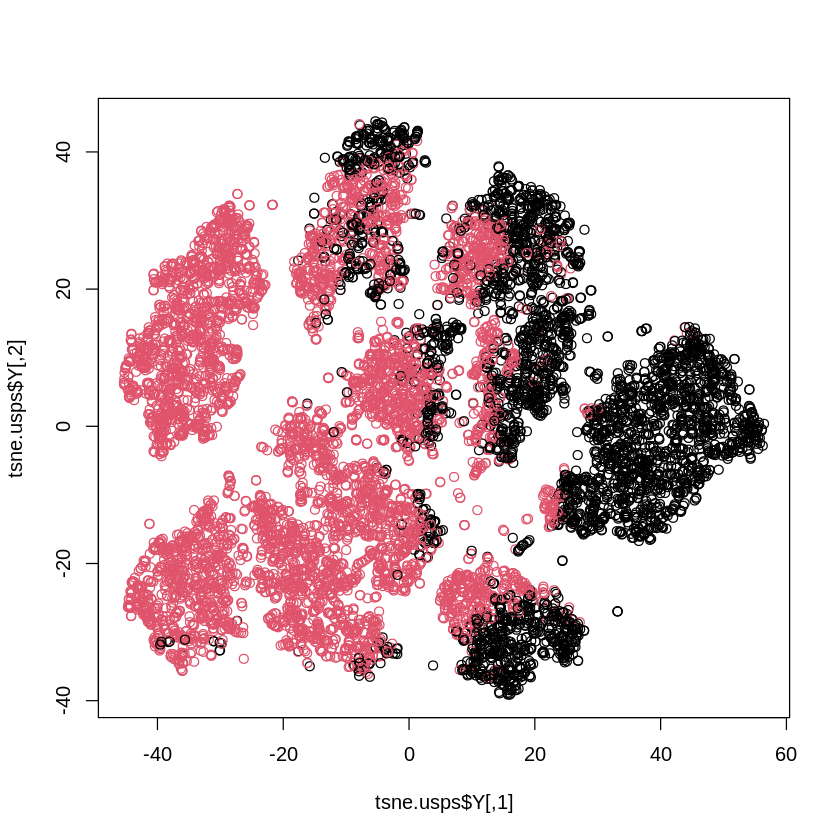

In [ ]:
plot(tsne.usps$Y,col=km.usps$Best.partition)

#### Average

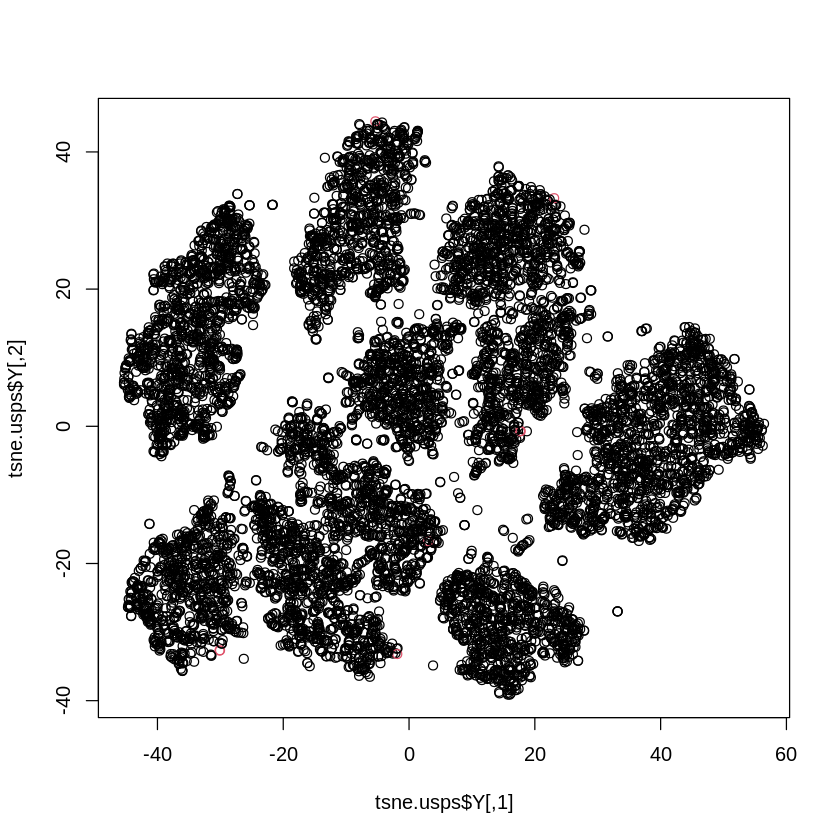

In [ ]:
plot(tsne.usps$Y,col=average.usps$Best.partition)

#### Ward

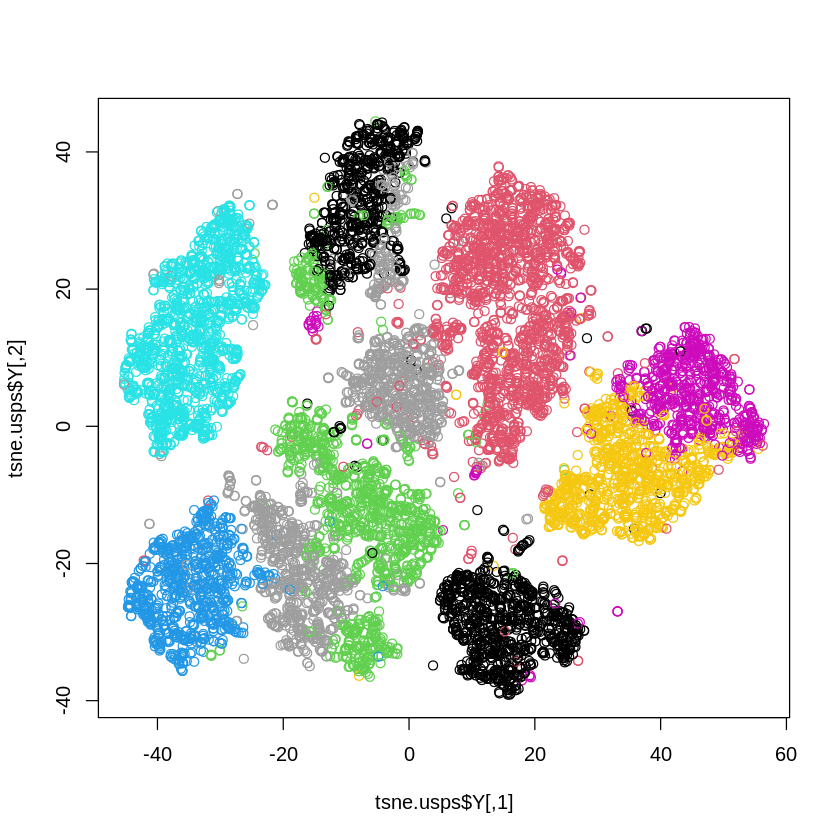

In [ ]:
plot(tsne.usps$Y,col=ward.usps$Best.partition)

#### Single

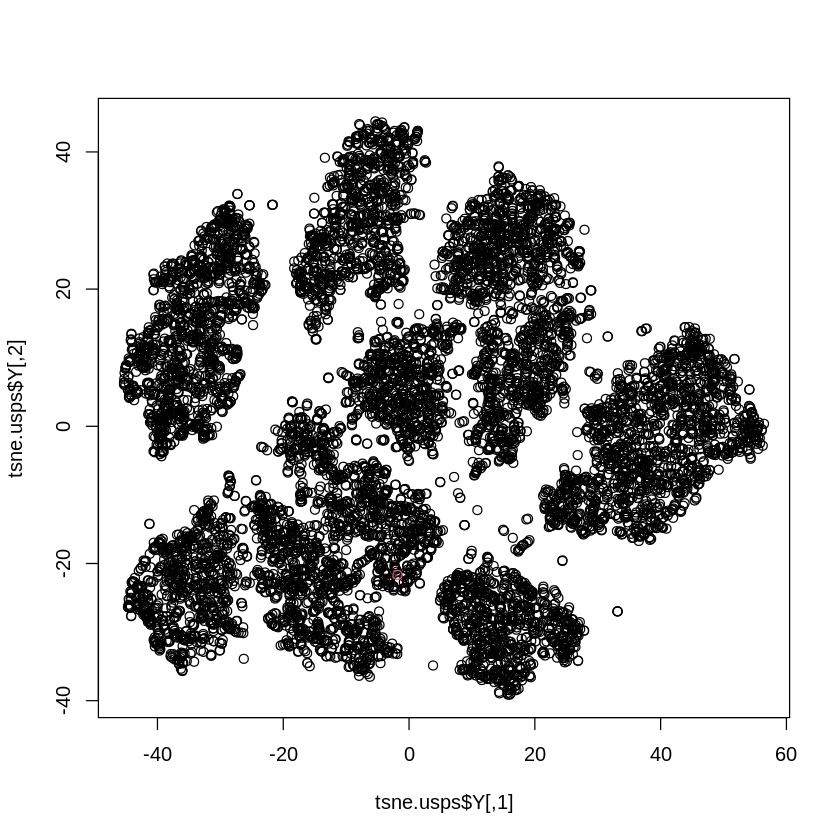

In [ ]:
plot(tsne.usps$Y,col=single.usps$Best.partition)

#### Complete

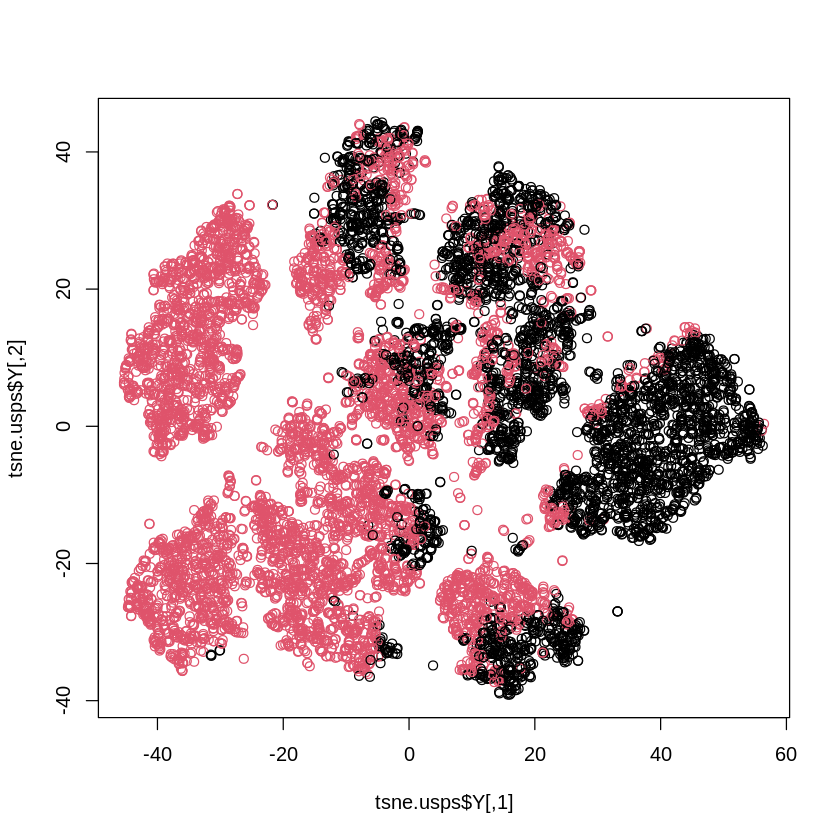

In [ ]:
plot(tsne.usps$Y,col=complete.usps$Best.partition)

### UMAP

In [ ]:
umap.usps = umap(usps$X)

In [ ]:
umap.usps

umap embedding of 9298 items in 2 dimensions
object components: layout, data, knn, config



#### Kmeans

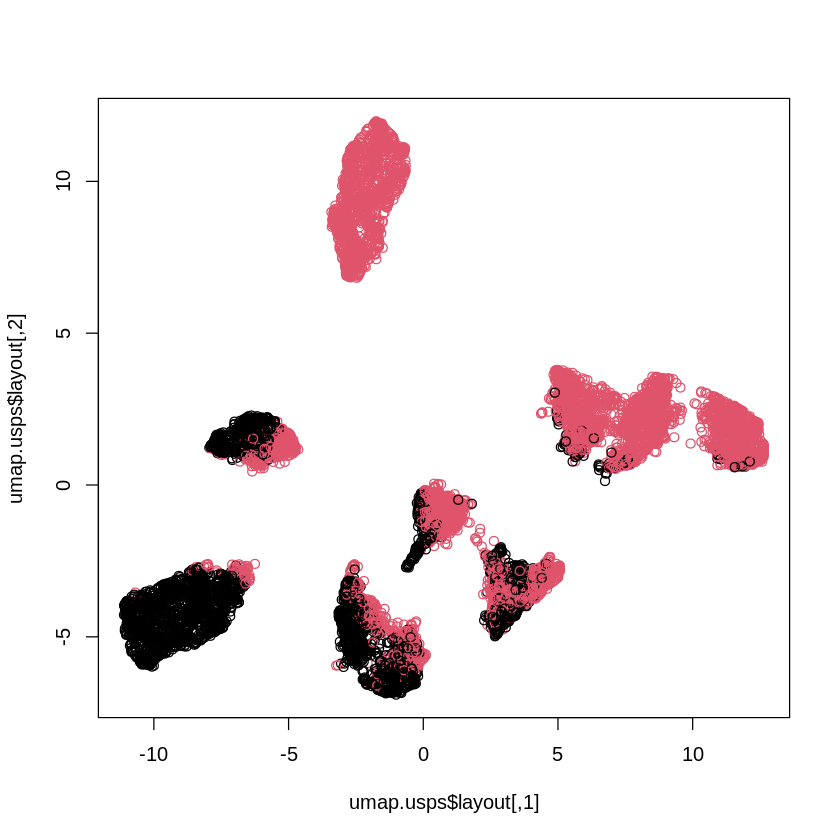

In [ ]:
plot(umap.usps$layout,col=km.usps$Best.partition)

#### Average

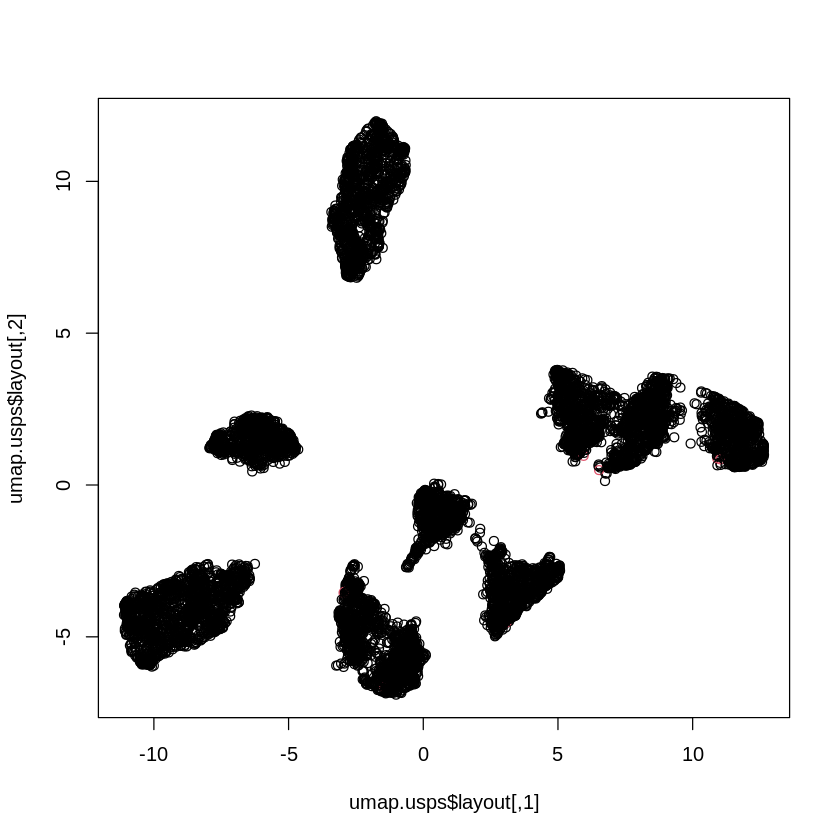

In [ ]:
plot(umap.usps$layout,col=average.usps$Best.partition)

#### Ward

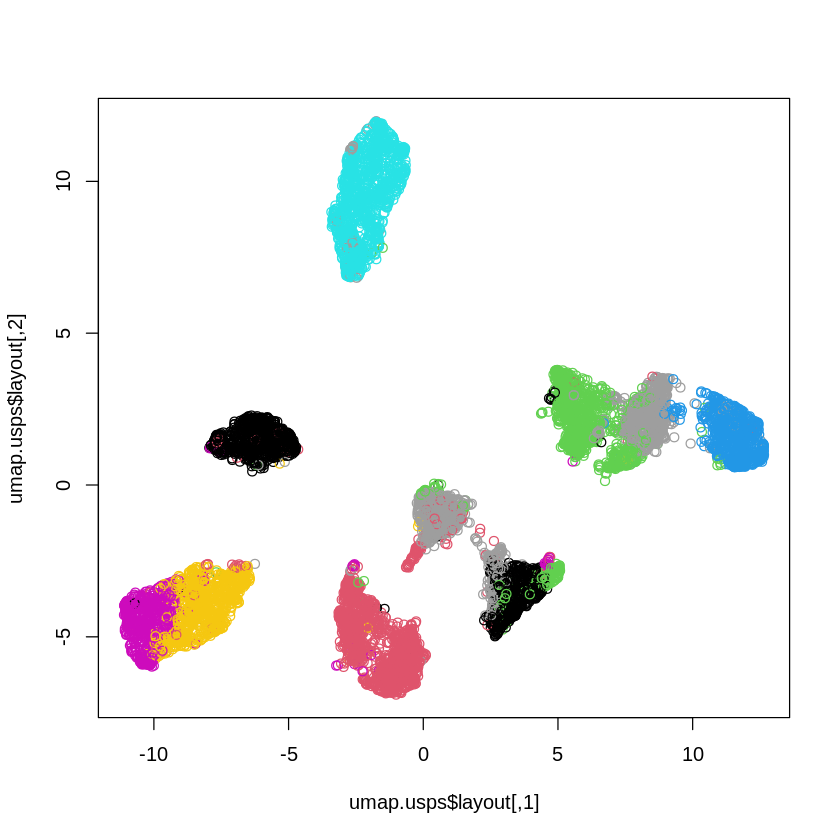

In [ ]:
plot(umap.usps$layout,col=ward.usps$Best.partition)

#### Single

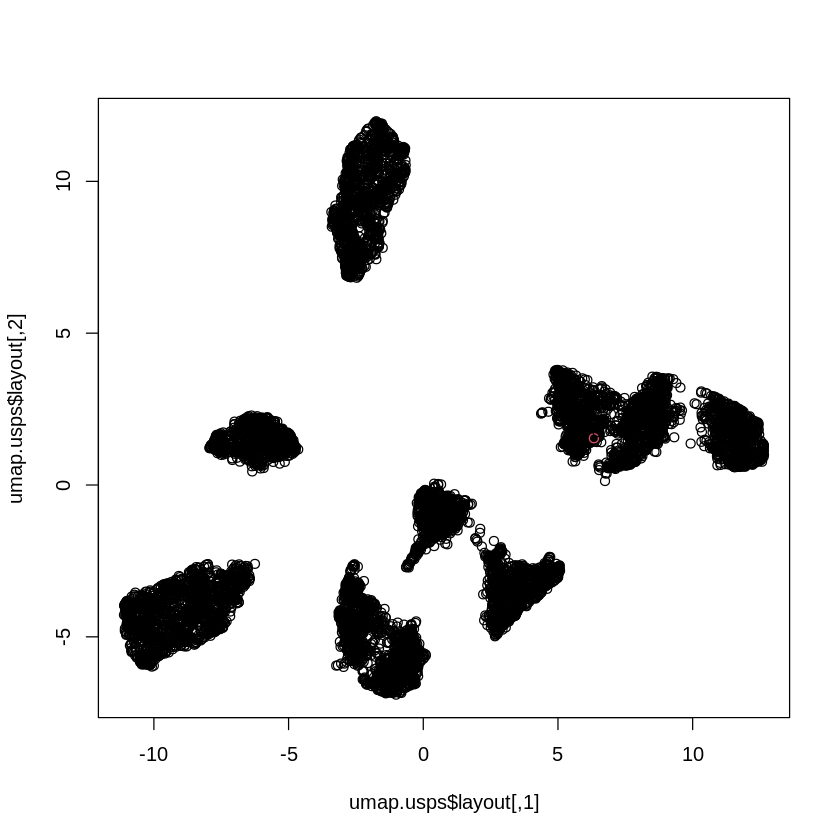

In [ ]:
plot(umap.usps$layout,col=single.usps$Best.partition)

#### Complete

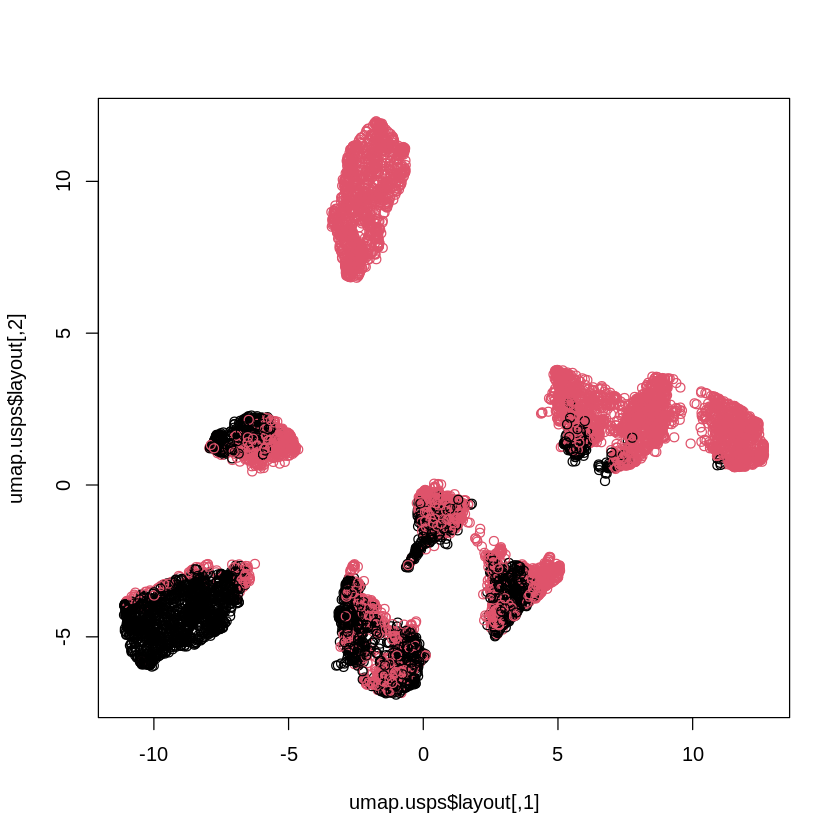

In [ ]:
plot(umap.usps$layout,col=complete.usps$Best.partition)

## Autoencoder

In [113]:
usps_reduced <- read.csv(file = 'data/usps_reduced.csv', header=F)

In [114]:
mmgMclust.usps_reduced=Mclust(data= usps_reduced)

In [115]:
mmgMclust.usps_reduced

'Mclust' model object: (VVV,9) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

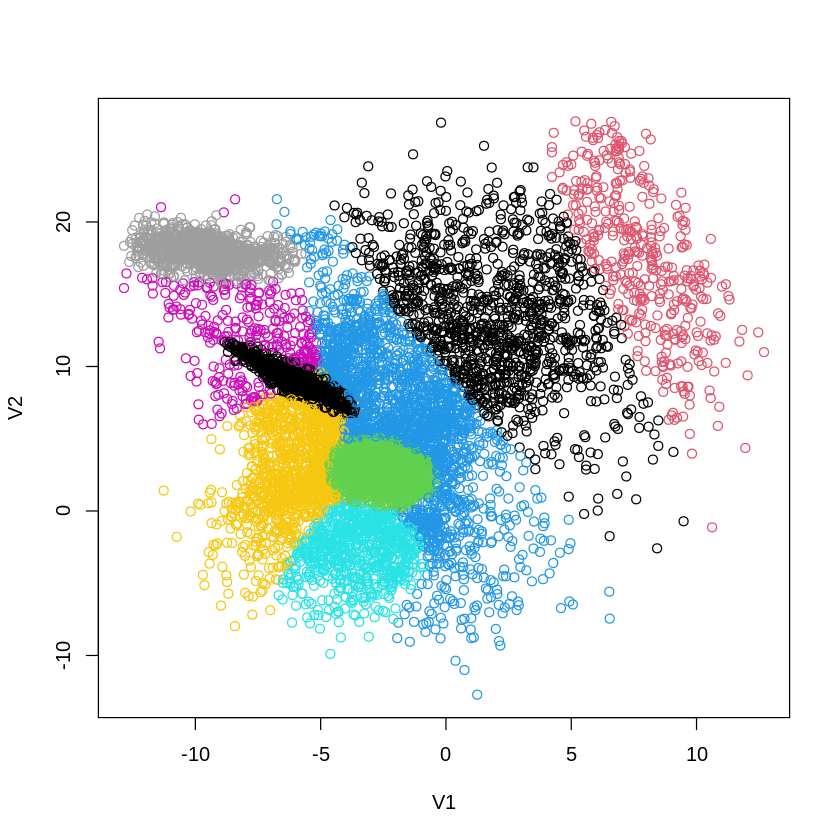

In [116]:
plot(usps_reduced,col=mmgMclust.usps_reduced$classification)

In [117]:
table(mmgMclust.usps_reduced$classification,usps$y)

   
       1    2    3    4    5    6    7    8    9   10
  1   46   14  201   30  469   53   97  101   53   99
  2    6    1  138    2  248   11    4    3    1    0
  3  135    0  119  599    0  408  148    1  298    8
  4  413   37  180  125  103  133  252  188  208  296
  5  682    0    1    0    1   12   34    0    8    1
  6    1   64   50    2   18    4    6   65   20   57
  7  269    2  198   59    0   89  289   29   91   41
  8    0 1145    0    0    8    0    0    7    2    3
  9    1    6   42    7    5    6    4  398   27  316

In [118]:
NMI(mmgMclust.usps_reduced$classification,as.vector(usps$y))

[1] 0.3662093

In [119]:
ARI(mmgMclust.usps_reduced$classification,as.vector(usps$y))

[1] 0.2672154

L'autoencoder a significativement amélioré les performances de la classification. On peut déduire également que les performances de l'autoencoder dépendent de la taille de données (il nécessitent un grand volume de données ce qui n'est pas toujours disponible).